In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Using TensorFlow backend.
W0717 16:37:29.863554 139796704999232 deprecation_wrapper.py:119] From /data/cenvs/tftest/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 16:37:29.871563 139796704999232 deprecation_wrapper.py:119] From /data/cenvs/tftest/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 16:37:29.873093 139796704999232 deprecation_wrapper.py:119] From /data/cenvs/tftest/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 16:37:29.888889 139796704999232 deprecation_wrapper.py:119] From /data/cenvs/tftest/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead

In [2]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [4]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [5]:
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [6]:
model.trainable_weights

[<tf.Variable 'dense_1/kernel:0' shape=(8192, 256) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32_ref>]

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import os

base_dir = '/data/images/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
rescale=1./255, 
rotation_range=40, 
width_shift_range=0.2, 
height_shift_range=0.2, 
shear_range=0.2, 
zoom_range=0.2, 
horizontal_flip=True, 
fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir, 
target_size=(150, 150), 
batch_size=20, 
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir, 
target_size=(150, 150), 
batch_size=20, 
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=2e-5), 
              metrics=['acc'])
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50)

W0717 17:03:37.076130 139796704999232 deprecation_wrapper.py:119] From /data/cenvs/tftest/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 17:03:37.081728 139796704999232 deprecation.py:323] From /data/cenvs/tftest/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
100/100 [==============================] - 21s 206ms/step - loss: 0.6020 - acc: 0.6765 - val_loss: 0.4668 - val_acc: 0.8150
Epoch 2/30
100/100 [==============================] - 18s 181ms/step - loss: 0.4962 - acc: 0.7735 - val_loss: 0.3879 - val_acc: 0.8460
Epoch 3/30
100/100 [==============================] - 18s 181ms/step - loss: 0.4457 - acc: 0.8135 - val_loss: 0.3448 - val_acc: 0.8650
Epoch 4/30
100/100 [==============================] - 18s 181ms/step - loss: 0.4057 - acc: 0.8265 - val_loss: 0.3198 - val_acc: 0.8800
Epoch 5/30
100/100 [==============================] - 18s 181ms/step - loss: 0.3886 - acc: 0.8220 - val_loss: 0.3096 - val_acc: 0.8670
Epoch 6/30
100/100 [==============================] - 18s 181ms/step - loss: 0.3775 - acc: 0.8285 - val_loss: 0.2875 - val_acc: 0.8870
Epoch 7/30
100/100 [==============================] - 18s 181ms/step - loss: 0.3620 - acc: 0.8490 - val_loss: 0.2924 - val_acc: 0.8840
Epoch 8/30
100/100 [==============================] - 1

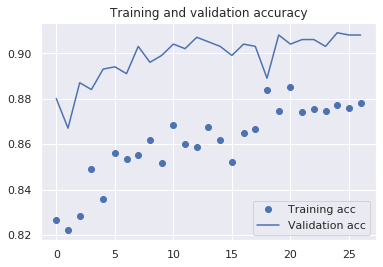

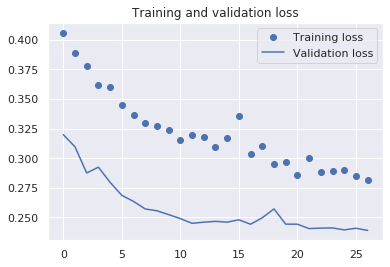

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

acc = history.history['acc'][3:]
val_acc = history.history['val_acc'][3:]
loss = history.history['loss'][3:]
val_loss = history.history['val_loss'][3:]

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [13]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 18s 183ms/step - loss: 0.2703 - acc: 0.8865 - val_loss: 0.2439 - val_acc: 0.9030
Epoch 2/100
100/100 [==============================] - 18s 180ms/step - loss: 0.2705 - acc: 0.8775 - val_loss: 0.2499 - val_acc: 0.9020
Epoch 3/100
100/100 [==============================] - 18s 180ms/step - loss: 0.2651 - acc: 0.8895 - val_loss: 0.2275 - val_acc: 0.9180
Epoch 4/100
100/100 [==============================] - 18s 180ms/step - loss: 0.2766 - acc: 0.8790 - val_loss: 0.2347 - val_acc: 0.9090
Epoch 5/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2793 - acc: 0.8810 - val_loss: 0.2453 - val_acc: 0.9070
Epoch 6/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2717 - acc: 0.8875 - val_loss: 0.2394 - val_acc: 0.9040
Epoch 7/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2816 - acc: 0.8780 - val_loss: 0.2338 - val_acc: 0.9030
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2580 - acc: 0.8970 - val_loss: 0.2464 - val_acc: 0.9010
Epoch 62/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2396 - acc: 0.9010 - val_loss: 0.2503 - val_acc: 0.9070
Epoch 63/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2537 - acc: 0.8905 - val_loss: 0.2458 - val_acc: 0.9010
Epoch 64/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2489 - acc: 0.8985 - val_loss: 0.2364 - val_acc: 0.9110
Epoch 65/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2291 - acc: 0.8995 - val_loss: 0.2302 - val_acc: 0.9040
Epoch 66/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2352 - acc: 0.9055 - val_loss: 0.2574 - val_acc: 0.8990
Epoch 67/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2368 - acc: 0.9075 - val_loss: 0.2324 - val_acc: 0.9030
Epoch 68/100
100/100 [===================

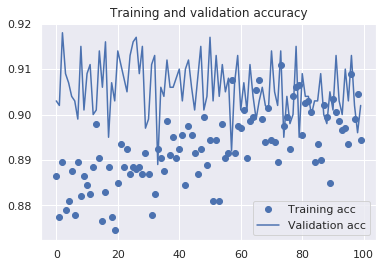

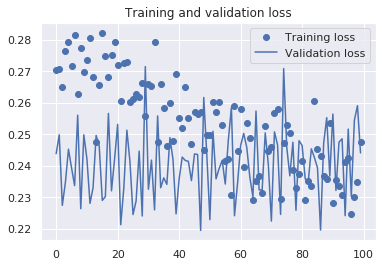

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

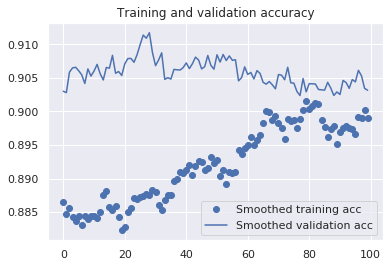

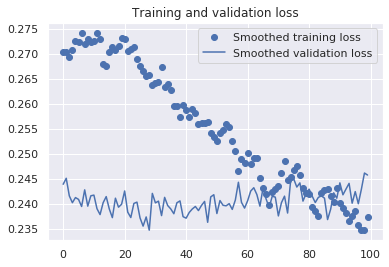

In [15]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9039999973773957
